In [ ]:
import numpy as np
import os
import glob
import json 

p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/stats_json/length_stats.json',p[i]+'/tracto_op_2_Lest/stats_json/length_stats.json']
    d[i] = a

all_len = {}
data_len = []
data_len1 = []
for i in d:

    if os.path.exists(d[i][0]):
        f = open(d[i][0])
        data = json.load(f)

    if os.path.exists(d[i][1]):
        f = open(d[i][1])
        data1 = json.load(f)
    
    k = list(data.keys())[0] 
    k1 = list(data1.keys())[0]
    if k == k1: 
        
        v = list(data[k].values()) # get the value of the subj dict
        v1 = list(data1[k1].values())

    
        #if len(v) == len(v1): # if the number of bundles generated is same
        vlen = []
        for j in range(len(v)): # compute pe
            #diff = abs ( (v[j]['mean_length'] - v1[j]['mean_length']) / v1[j]['mean_length'] ) * 100
            vlen.append(v[j]['mean_length'])
        mean = np.mean(vlen)
        vlen1 = []
        for j in range(len(v1)):
            vlen1.append(v1[j]['mean_length'])
        mean1 = np.mean(vlen1)

#             su += vlen          # sum 
#             su1 += vlen1
            
#         mean_diff = su / len(v)  # mean 
#         mean_diff1 = su1 / len(v1)
#         else:
#             mean_diff = 0
#             mean_diff1 = 0
    data_len.append(mean)
    data_len1.append(mean1)
    all_len[i] = [mean, mean1]

# print(all_len)

In [ ]:
import pandas as pd
csv_data = pd.read_csv('/nfs/masi/kanakap/kids_sessions.csv')
csv_data['sex'].replace(['male','female'],['b','r'],inplace=True)
csv_data['age'] = np.where(csv_data['age'].between(5,5.9),1,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(6,6.9),2,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(7,7.9),3,csv_data['age'])
csv_data['age'] = np.where(csv_data['age'].between(8,8.9),4,csv_data['age'])
csv_data['age'].replace([1,2,3,4],['o','x','^','+'],inplace=True)
csv_data

In [ ]:
def bland_altman_plot(data1, data2, labels, sym, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    for i in range(len(sym)):
        plt.scatter(mean[i], diff[i], c=labels[i], marker=sym[i], s=120, *args, **kwargs)
    
    legend_element = [Line2D([0],[0], lw=4,color='b',label='Male',markersize=8),
                      Line2D([0],[0], lw=4,color='r',label='Female',markersize=8),
                     Line2D([],[], marker='o',color='k',label='Age 5 - 5.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='x',color='k',label='Age 6 - 6.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='^',color='k',label='Age 7 - 7.9',linestyle='None',markersize=10),
                     Line2D([],[], marker='+',color='k',label='Age 8 - 8.9',linestyle='None',markersize=10)]
    plt.legend(handles=legend_element)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')

In [ ]:
from matplotlib.lines import Line2D 
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
bland_altman_plot(data_len,data_len1,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for mean length with L(r) corruption',fontsize=25)
plt.xlabel('Mean',fontsize=25)
plt.ylabel('Difference',fontsize=25)
plt.rcParams.update({'font.size':25})

In [ ]:
import numpy as np
import os
import glob
import json 

p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_1_Lest/stats_json/volumes.json',p[i]+'/tracto_op_2_Lest/stats_json/volumes.json']
    d[i] = a

all_vol = {}
data_vol = []
data_vol1 = []
for i in d:
    if os.path.exists(d[i][0]):
        f = open(d[i][0])
        data = json.load(f)

    if os.path.exists(d[i][1]):
        f = open(d[i][1])
        data1 = json.load(f)
    
    k = list(data.keys())[0]
    k1 = list(data1.keys())[0]
    if k == k1:
        v = list(data[k].values())
        v1 = list(data1[k1].values())
        vol = []
        for j in range(len(v)): # compute pe
            #diff = abs ( (v[j]['mean_length'] - v1[j]['mean_length']) / v1[j]['mean_length'] ) * 100
            vol.append(v[j]['volume'])
        mean = np.mean(vol)
        vol1 = []
        for j in range(len(v1)):
            vol1.append(v1[j]['volume'])
        mean1 = np.mean(vol1)
#         su = 0 
#         su1 = 0
#         if len(v) == len(v1):
#             for j in range(len(v)):
#                 #diff = abs ( ( v[j]['volume'] - v1[j]['volume'] ) / v1[j]['volume'] ) * 100
#                 vol = v[j]['volume']
#                 vol1 = v1[j]['volume']
#                 su += vol
#                 su1 += vol1
#             mean_diff = su / len(v)
#             mean_diff1 = su1 / len(v1)

    data_vol.append(mean)
    data_vol1.append(mean1)
    all_vol[i] = [mean, mean1]

In [ ]:
plt.figure(figsize=(15,12))
bland_altman_plot(data_vol,data_vol1,list(csv_data['sex']),list(csv_data['age']))
plt.title('Bland-Altman for mean volume with L(r) corruption',fontsize=25)
plt.xlabel('Mean',fontsize=25)
plt.ylabel('Difference',fontsize=25)
plt.rcParams.update({'font.size':25})

In [13]:
import numpy as np
import os
import glob
import json 

p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()

In [19]:
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_corpt_1/stats_json/length_stats.json',p[i]+'/tracto_op_corpt_2/stats_json/length_stats.json']
    d[i] = a
count = 0
dicts = []
for i in d:
    
    if os.path.exists(d[i][0]) and os.path.exists(d[i][1]):
        f = open(d[i][0])
        data = json.load(f)
        mean_len = {} # make a new dict with mapping bundles and meanlength
        k = list(data.keys())[0] 
        b_key = list(data[k].keys())# get the bundles
        v = list(data[k].values())  # get the values
        for j in range(len(b_key)): 

            mean_len[b_key[j]] = v[j]['mean_length'] # assign bundle to mean length


        f = open(d[i][1])
        data1 = json.load(f)
        count = count + 1
        mean_len1 = {} # make a new dict with mapping bundles and meanlength

        k1 = list(data1.keys())[0] 
        b_key1 = list(data1[k1].keys())# get the bundles
        v1 = list(data1[k1].values())  # get the values
        for j in range(len(b_key1)): 

            mean_len1[b_key1[j]] = v1[j]['mean_length'] # assign bundle to mean length

        diff = {}
        for key in mean_len: 
            if key in mean_len1:
                c_mean = np.nanmean([mean_len[key] , mean_len1[key]])
                c_std = np.nanstd([mean_len[key] , mean_len1[key]])
                diff[key] = (c_std / c_mean)  
    else:
        diff = 'nan'
            
    dicts.append(diff)
import pandas as pd
elen_df = pd.DataFrame()
for i in dicts:
    if i != 'nan':
        for key in i:
            new_row = {'0': i[key], 'x':key, 'lr':'corpt'}
            elen_df = elen_df.append(new_row, ignore_index=True )

In [20]:
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_lr_corr_1/stats_json/length_stats.json',p[i]+'/tracto_op_lr_corr_2/stats_json/length_stats.json']
    d[i] = a
count = 0
dicts = []
for i in d:
    
    if os.path.exists(d[i][0]) and os.path.exists(d[i][1]):
        f = open(d[i][0])
        data = json.load(f)
        mean_len = {} # make a new dict with mapping bundles and meanlength
        k = list(data.keys())[0] 
        b_key = list(data[k].keys())# get the bundles
        v = list(data[k].values())  # get the values
        for j in range(len(b_key)): 

            mean_len[b_key[j]] = v[j]['mean_length'] # assign bundle to mean length


        f = open(d[i][1])
        data1 = json.load(f)
        count = count + 1
        mean_len1 = {} # make a new dict with mapping bundles and meanlength

        k1 = list(data1.keys())[0] 
        b_key1 = list(data1[k1].keys())# get the bundles
        v1 = list(data1[k1].values())  # get the values
        for j in range(len(b_key1)): 

            mean_len1[b_key1[j]] = v1[j]['mean_length'] # assign bundle to mean length

        diff = {}
        for key in mean_len: 
            if key in mean_len1:
                c_mean = np.nanmean([mean_len[key] , mean_len1[key]])
                c_std = np.nanstd([mean_len[key] , mean_len1[key]])
                diff[key] = (c_std / c_mean)  
    else:
        diff = 'nan'
            
    dicts.append(diff)
import pandas as pd
len_df = pd.DataFrame()
for i in dicts:
    if i != 'nan':
        for key in i:
            new_row = {'0': i[key], 'x':key, 'lr':'corr'}
            len_df = len_df.append(new_row, ignore_index=True )
            

In [21]:
a  = pd.concat([elen_df,len_df])
b = a[(a.x == 'AC')]
c = a[(a.x == 'CG_L')]
d = a[(a.x == 'CG_R')]
e = a[(a.x == 'FX_L')]
f = a[(a.x == 'FX_R')]
g = a[(a.x == 'ICP_L')]
h = a[(a.x == 'ICP_R')]
i = a[(a.x == 'PC')]


high = pd.concat([b,c,d,e,f,g,h,i])

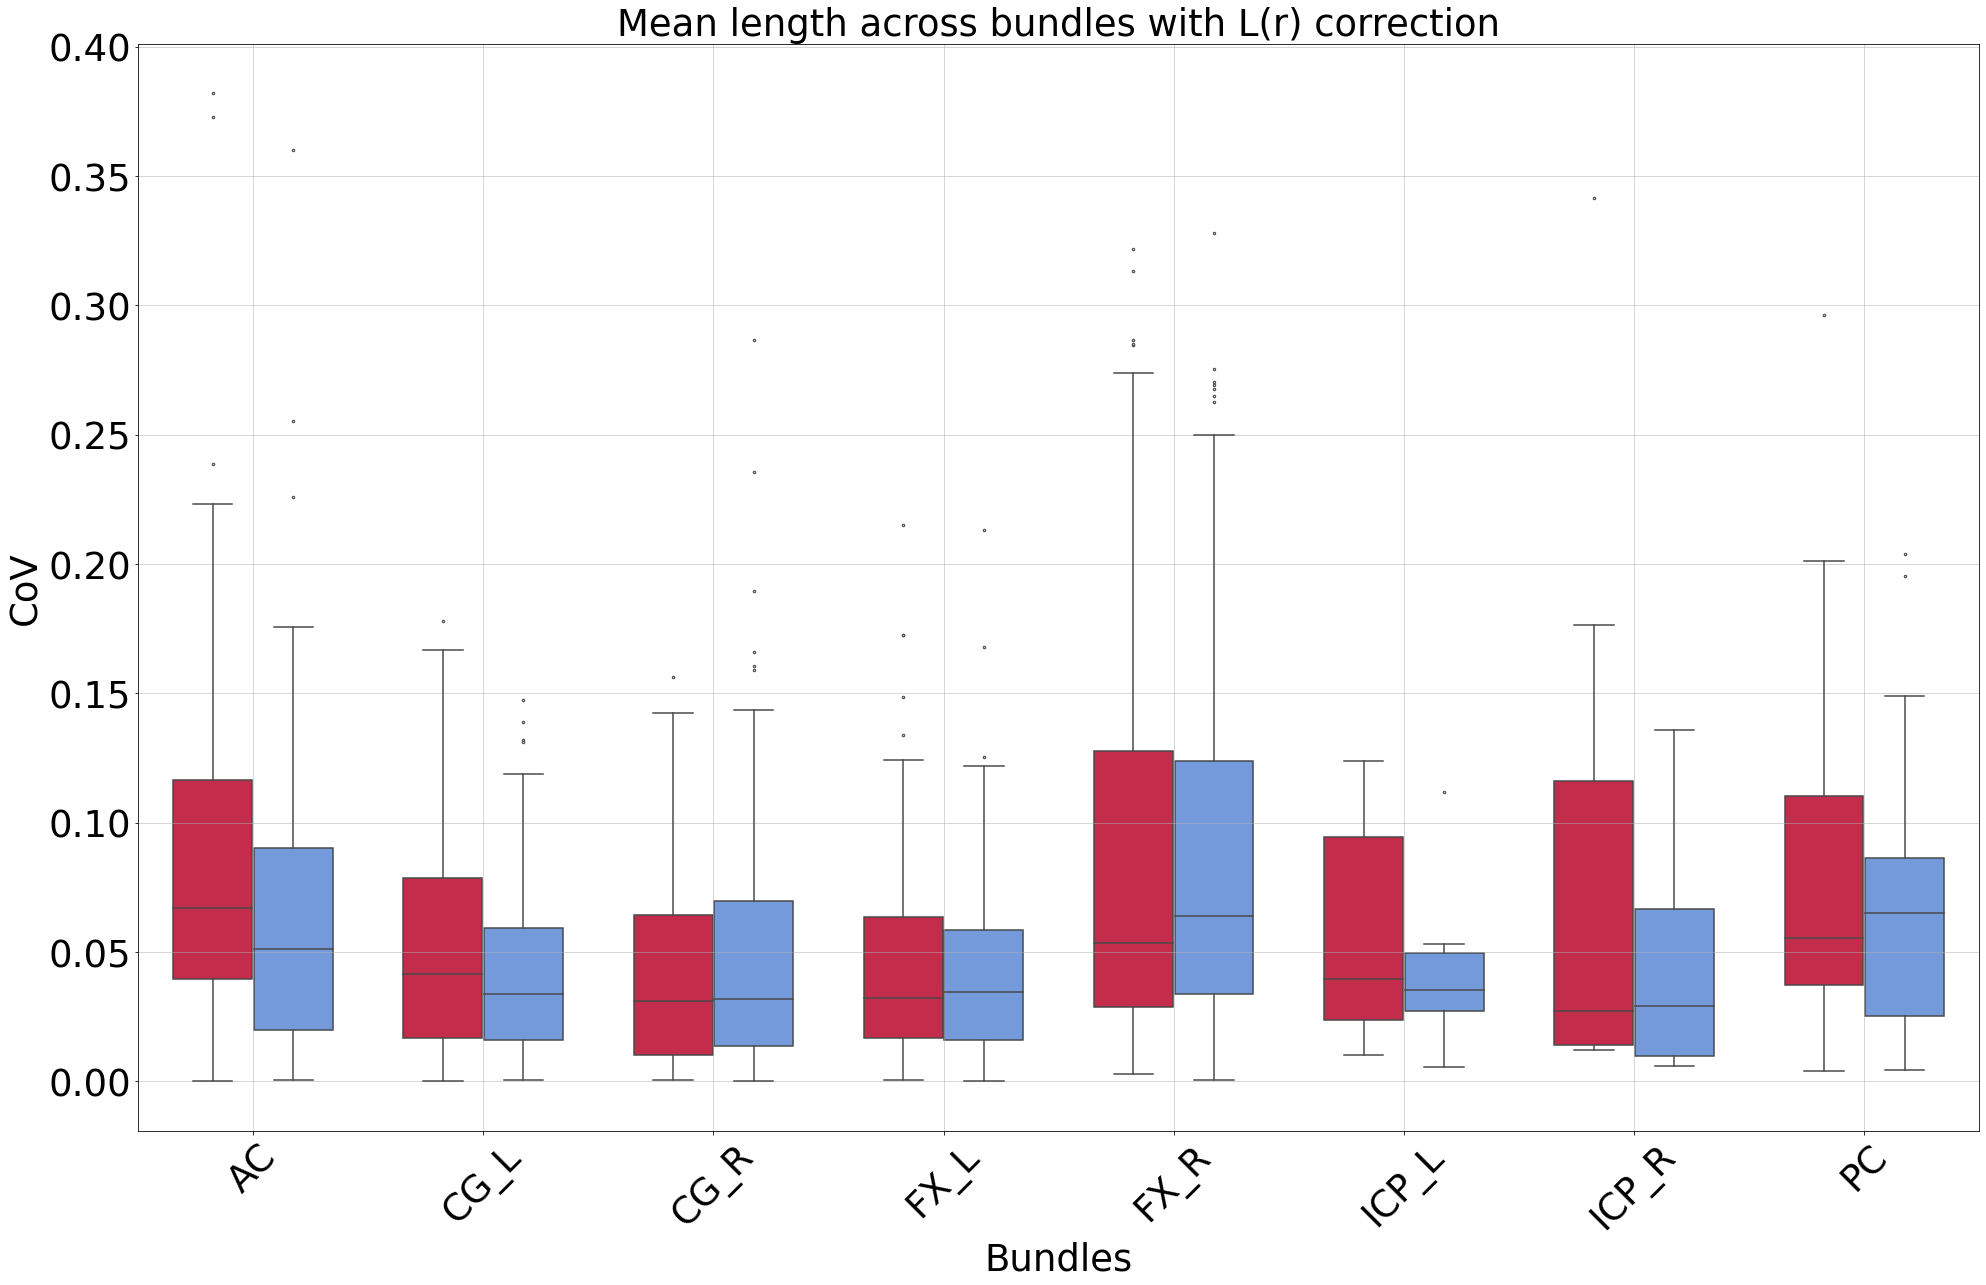

In [25]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(33,20))
plt.rcParams.update({'font.size':37})
palette= {'corpt': 'crimson','corr': 'cornflowerblue'}
flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
ax = sns.boxplot(x='x',y='0',data=high, hue = 'lr',flierprops=flierprops, width=0.7,palette=palette)
plt.title('Mean length across bundles with L(r) correction', fontsize = 37)
plt.xlabel('Bundles', fontsize = 37)
plt.ylabel('CoV', fontsize = 37)
a = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.grid(True,linewidth=0.5)
plt.legend([],[],frameon=False)
plt.savefig('fig7.png')

In [23]:
def cohend(c0,c1):
    cohens_d = (np.mean(c0) - np.mean(c1)) / (np.sqrt((np.std(c0) ** 2 + np.std(c1) ** 2) / 2))
    return cohens_d

In [24]:
len_grouped = len_df.groupby(len_df['x'])
len_egrouped = elen_df.groupby(elen_df['x'])
for key in len_egrouped.groups:
    la = cohend(len_egrouped.get_group(key)['0'],len_grouped.get_group(key)['0'])
    print(abs(round(la,4)))
    #print(key)
    #print(la)

0.2991
0.0065
0.0389
0.0528
0.1257
0.0287
0.0697
0.1004
0.1093
0.2384
0.075
0.0361
0.1974
0.0598
0.1339
0.096
0.0174
0.3606
0.4897
0.0195
0.0603
0.0517
0.0074
0.0111
0.1616
0.1296
0.1761
0.0861
0.1667
0.0196
0.1532
0.1288
0.0373
0.0413
0.0875
0.0672
0.0259
0.1285
0.0239


In [26]:
import numpy as np
import os
import glob
import json 

p = []
for path in glob.glob('/nfs/masi/kanakap/projects/LR_tract/MASiVar_kids/*/*'):
    p.append(path)
p.sort()


In [27]:
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_corpt_1/stats_json/volumes.json',p[i]+'/tracto_op_corpt_2/stats_json/volumes.json']
    d[i] = a
count = 0
dictsvol = []
for i in d:
    
    if os.path.exists(d[i][0]) and os.path.exists(d[i][1]):
        f = open(d[i][0])
        data = json.load(f)
        mean_len = {} # make a new dict with mapping bundles and meanlength
        k = list(data.keys())[0] 
        b_key = list(data[k].keys())# get the bundles
        v = list(data[k].values())  # get the values
        for j in range(len(b_key)): 

            mean_len[b_key[j]] = v[j]['volume'] # assign bundle to mean length

    
        f = open(d[i][1])
        data1 = json.load(f)
        count = count + 1
        mean_len1 = {} # make a new dict with mapping bundles and meanlength

        k1 = list(data1.keys())[0] 
        b_key1 = list(data1[k1].keys())# get the bundles
        v1 = list(data1[k1].values())  # get the values
        for j in range(len(b_key1)): 

            mean_len1[b_key1[j]] = v1[j]['volume'] # assign bundle to mean length

        diff = {}
        for key in mean_len: 
            if key in mean_len1:
                c_mean = np.nanmean([mean_len[key] , mean_len1[key]])
                c_std = np.nanstd([mean_len[key] , mean_len1[key]])
                diff[key] = (c_std / c_mean)  
    else:
        diff = 'nan'
            
    dictsvol.append(diff)
edf = pd.DataFrame()
for i in dictsvol:
    if i != 'nan':
        for key in i:
            #df = df.append({key: i[key]}, ignore_index=True )
            new_row = {'0': i[key], 'x':key, 'lr': 'corpt'}
            edf = edf.append(new_row, ignore_index=True )

In [28]:
d = {}
for i in range(len(p)):
    a = [p[i]+'/tracto_op_lr_corr_1/stats_json/volumes.json',p[i]+'/tracto_op_lr_corr_2/stats_json/volumes.json']
    d[i] = a
count = 0
dictsvol = []
for i in d:
    
    if os.path.exists(d[i][0]) and os.path.exists(d[i][1]):
        f = open(d[i][0])
        data = json.load(f)
        mean_len = {} # make a new dict with mapping bundles and meanlength
        k = list(data.keys())[0] 
        b_key = list(data[k].keys())# get the bundles
        v = list(data[k].values())  # get the values
        for j in range(len(b_key)): 

            mean_len[b_key[j]] = v[j]['volume'] # assign bundle to mean length

    
        f = open(d[i][1])
        data1 = json.load(f)
        count = count + 1
        mean_len1 = {} # make a new dict with mapping bundles and meanlength

        k1 = list(data1.keys())[0] 
        b_key1 = list(data1[k1].keys())# get the bundles
        v1 = list(data1[k1].values())  # get the values
        for j in range(len(b_key1)): 

            mean_len1[b_key1[j]] = v1[j]['volume'] # assign bundle to mean length

        diff = {}
        for key in mean_len: 
            if key in mean_len1:
                c_mean = np.nanmean([mean_len[key] , mean_len1[key]])
                c_std = np.nanstd([mean_len[key] , mean_len1[key]])
                diff[key] = (c_std / c_mean)  
    else:
        diff = 'nan'
            
    dictsvol.append(diff)
df = pd.DataFrame()
for i in dictsvol:
    if i != 'nan':
        for key in i:
            #df = df.append({key: i[key]}, ignore_index=True )
            new_row = {'0': i[key], 'x':key, 'lr': 'corr'}
            df = df.append(new_row, ignore_index=True )

In [33]:
a  = pd.concat([edf,df])
b = a[(a.x == 'AC')]
c = a[(a.x == 'CG_L')]
d = a[(a.x == 'CG_R')]
e = a[(a.x == 'FX_L')]
f = a[(a.x == 'FX_R')]
g = a[(a.x == 'ICP_L')]
h = a[(a.x == 'ICP_R')]
i = a[(a.x == 'PC')]


high = pd.concat([b,c,d,e,f,g,h,i])

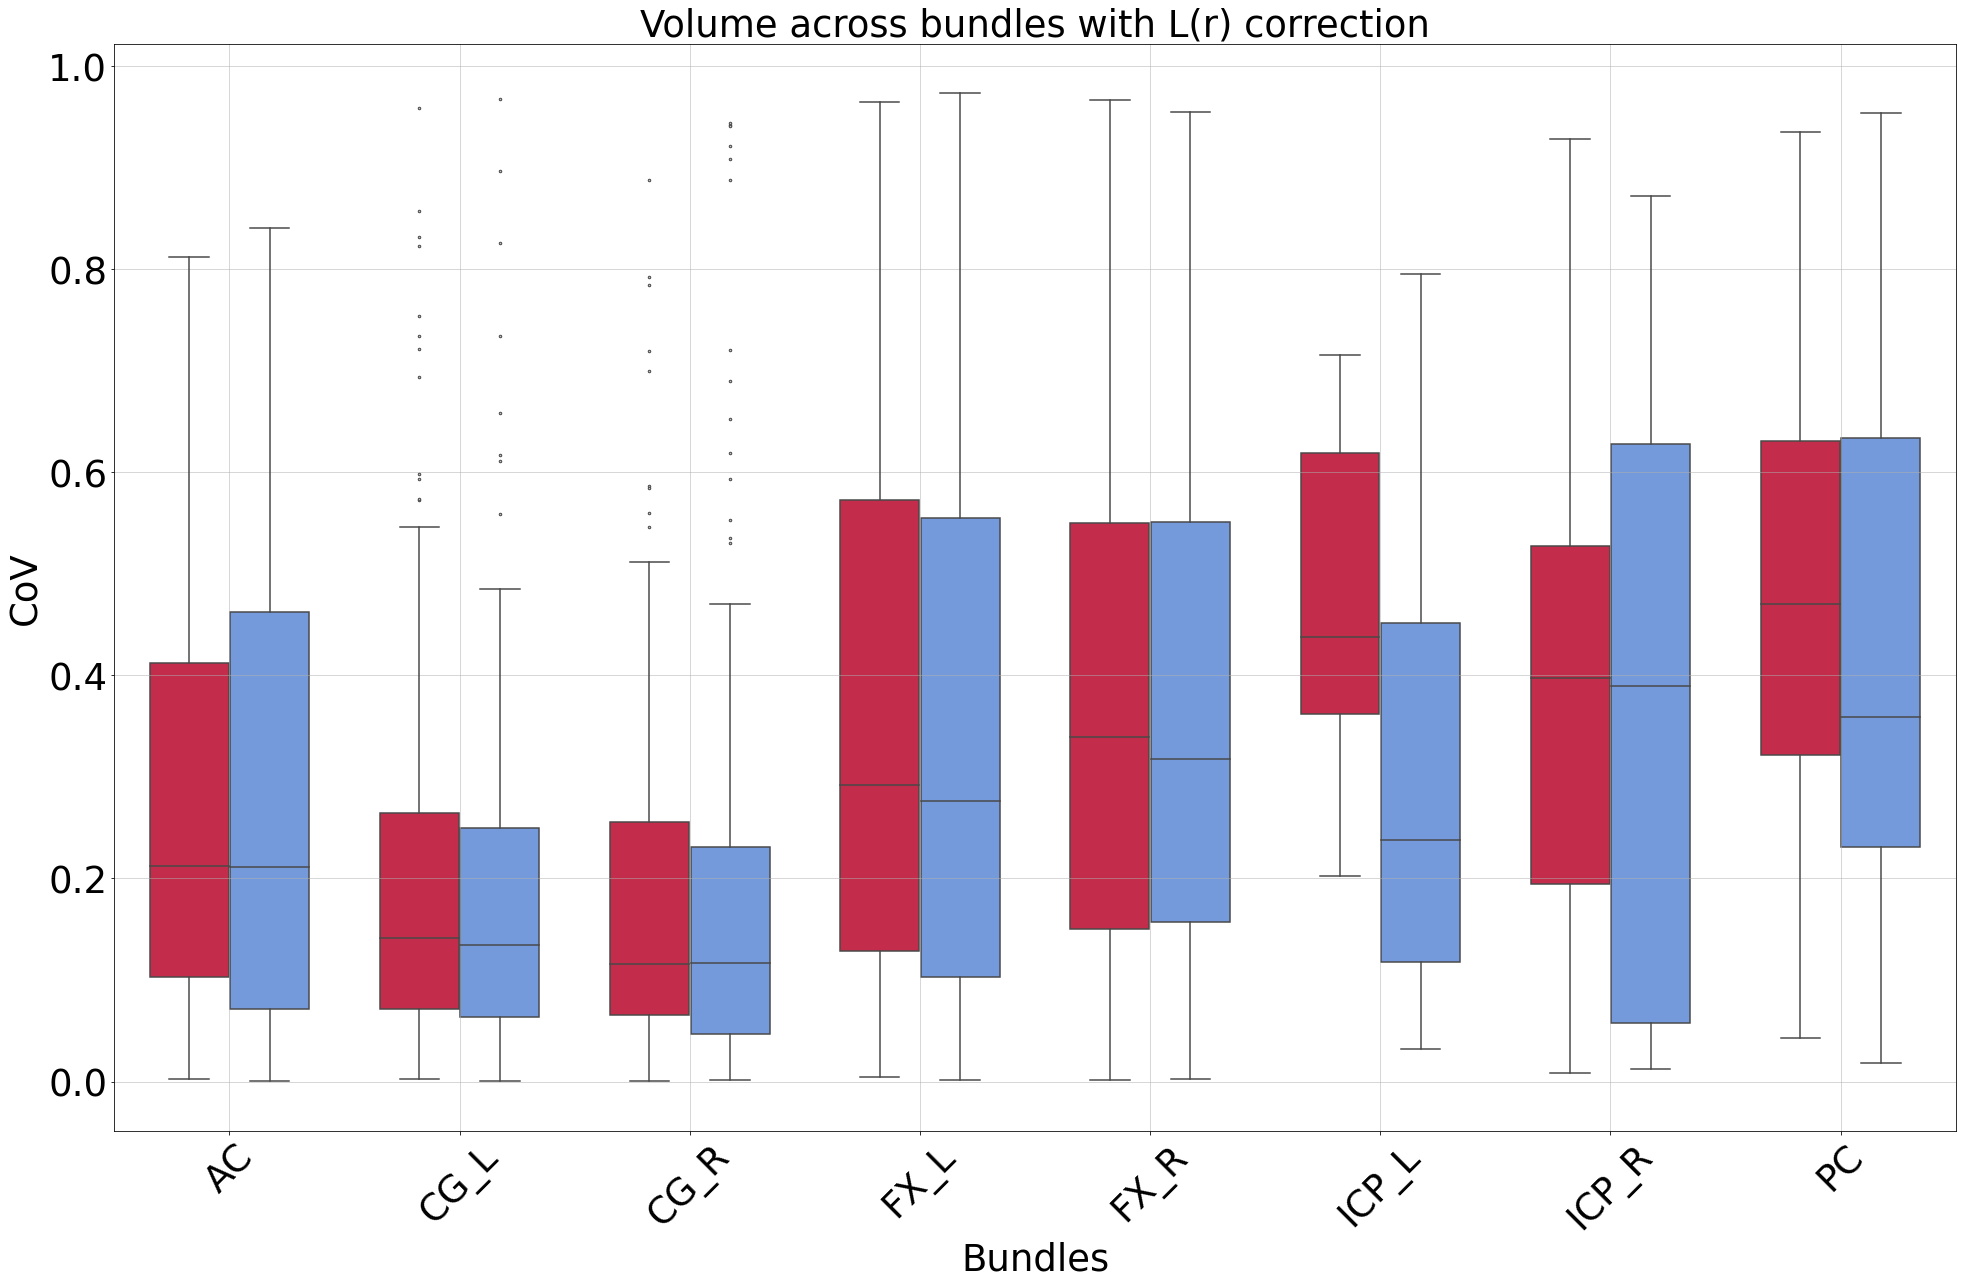

In [36]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(33,20))
plt.rcParams.update({'font.size':37})

flierprops = dict(markerfacecolor='0.75', markersize=5, marker='.',
              linestyle='none')
ax = sns.boxplot(x='x',y='0',data=high, hue = 'lr',flierprops=flierprops, width=0.7,palette=palette)
plt.title('Volume across bundles with L(r) correction', fontsize = 37)
plt.xlabel('Bundles', fontsize = 37)
plt.ylabel('CoV', fontsize = 37)
a = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.grid(True,linewidth=0.5)
plt.legend([],[],frameon=False)
plt.savefig('fig8.png')

In [35]:
vol_grouped = df.groupby(df['x'])
vol_egrouped = edf.groupby(edf['x'])
for key in vol_egrouped.groups:
    la = cohend(vol_egrouped.get_group(key)['0'],vol_grouped.get_group(key)['0'])
    print(abs(round(la,4)))
    #print(key)

0.0412
0.0246
0.0936
0.1245
0.1114
0.1189
0.0634
0.0873
0.0339
0.1174
0.0359
0.1134
0.1698
0.0575
0.16
0.0302
0.0504
0.6743
0.027
0.0083
0.088
0.0829
0.1292
0.0888
0.0368
0.0635
0.2014
0.0381
0.2891
0.0131
0.1544
0.028
0.0387
0.0927
0.026
0.0534
0.0081
0.0349
0.0542


In [ ]:
df